## Preprocessing-Create Corpus

**Load Data**

In [1]:
# Load Data
import pickle

with open('WeightedMatrixSenVec.pkl', 'rb') as f:
    data = pickle.load(f)

data = data.head(1000)

In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,sentence
0,-0.013218,-0.052821,0.002264,0.043413,0.003757,0.011176,-0.027945,-0.017823,0.006229,-0.030097,...,-0.023402,0.009105,0.025322,0.050949,0.026308,0.031959,-0.025402,-0.027967,0.018207,the gentleman i spoke with at lindbergh twr ov...
1,0.029084,-0.066272,-0.000495,-0.027573,-0.027134,-0.055710,-0.065487,-0.024917,0.026715,0.083382,...,-0.057660,-0.075967,0.083767,-0.029692,0.035184,0.031133,-0.056077,-0.009943,-0.061518,"""""approx 5 mi nw of the mission bay vor"", whil..."
2,0.001719,-0.044480,0.043837,0.060715,0.064162,-0.042237,0.020223,0.038679,0.017781,-0.003049,...,-0.024354,0.003997,-0.007388,-0.021871,-0.017296,0.070690,-0.014388,0.019626,0.010093,w/o hesitation i quickly changed freqs to find...
3,-0.010030,-0.037978,-0.011218,0.008807,-0.021877,0.023408,-0.046795,-0.021728,0.020444,0.041620,...,-0.008280,-0.061070,0.056864,0.017233,0.017288,-0.024562,-0.033899,0.006795,-0.014894,as i was trying to contact the third san apch ...
4,-0.026332,-0.018215,0.009935,-0.005019,0.033827,0.037565,0.015645,-0.030064,-0.006868,0.022815,...,-0.004909,-0.034214,0.021599,0.004486,0.012018,0.034058,-0.075569,0.047464,0.000348,after several attempts to contact this third c...


In [3]:
import gensim
from gensim.utils import simple_preprocess
from tqdm import tqdm

**Create tokens**

In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

df = data.sentence.values.tolist()
data_words = list(sent_to_words(df))

print(data_words[:1][0][:30])

['the', 'gentleman', 'spoke', 'with', 'at', 'lindbergh', 'twr', 'over', 'the', 'phone', 'was', 'very', 'polite', 'and', 'seemed', 'to', 'be', 'primarily', 'concerned', 'with', 'the', 'sudden', 'surprise', 'of', 'my', 'presence', 'in', 'his', 'ata']


In [5]:
data_words[0]

['the',
 'gentleman',
 'spoke',
 'with',
 'at',
 'lindbergh',
 'twr',
 'over',
 'the',
 'phone',
 'was',
 'very',
 'polite',
 'and',
 'seemed',
 'to',
 'be',
 'primarily',
 'concerned',
 'with',
 'the',
 'sudden',
 'surprise',
 'of',
 'my',
 'presence',
 'in',
 'his',
 'ata']

In [6]:
import gensim.corpora as corpora

In [7]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

print('How many words in this data set:', len(id2word))

# Create Corpus
texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

How many words in this data set: 2532
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2)]


In [8]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 3),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 2)]

## Find best number of topic

In [11]:
from gensim.models import CoherenceModel

def compute_coherence_values(corpus, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    score = coherence_model_lda.get_coherence()
    
    return score

In [12]:
k_list = range(10, 800, 10)
scores = []
for k in tqdm(k_list):
    score = compute_coherence_values(corpus, k)
    scores.append(score)

100%|██████████| 79/79 [46:50<00:00, 35.58s/it]


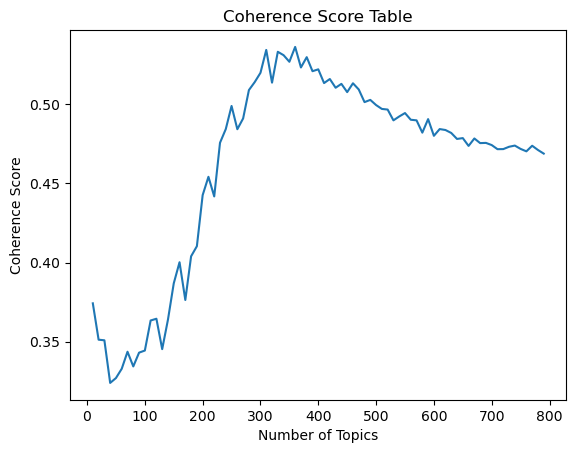

In [13]:
import matplotlib.pyplot as plt

plt.plot(k_list, scores)
plt.title('Coherence Score Table')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()
max_index = scores.index(max(scores))
num_topics = k_list[max_index]

## Build LDA with best k

In [14]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [15]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(154,
  '0.107*"the" + 0.070*"bos" + 0.066*"to" + 0.054*"cockpit" + 0.047*"ny" + '
  '0.045*"and" + 0.040*"for" + 0.037*"in" + 0.033*"as" + 0.029*"into"'),
 (6,
  '0.219*"fuel" + 0.123*"tank" + 0.076*"board" + 0.076*"in" + 0.057*"total" + '
  '0.043*"of" + 0.038*"on" + 0.038*"lbs" + 0.031*"the" + 0.030*"and"'),
 (117,
  '0.002*"dep" + 0.002*"the" + 0.001*"was" + 0.001*"to" + 0.001*"fritto" + '
  '0.001*"on" + 0.001*"den" + 0.001*"trans" + 0.001*"per" + 0.001*"as"'),
 (192,
  '0.000*"urge" + 0.000*"artcc" + 0.000*"assign" + 0.000*"commentary" + '
  '0.000*"mix" + 0.000*"phraseology" + 0.000*"strongly" + 0.000*"together" + '
  '0.000*"issuing" + 0.000*"seated"'),
 (273,
  '0.000*"urge" + 0.000*"artcc" + 0.000*"assign" + 0.000*"commentary" + '
  '0.000*"mix" + 0.000*"phraseology" + 0.000*"strongly" + 0.000*"together" + '
  '0.000*"issuing" + 0.000*"seated"'),
 (239,
  '0.000*"urge" + 0.000*"artcc" + 0.000*"assign" + 0.000*"commentary" + '
  '0.000*"mix" + 0.000*"phraseology" + 0.000*"str

In [16]:
from gensim.models import CoherenceModel
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity:  -38.87604735837188
Coherence Score:  0.5357311617214255


In [17]:
sent_topics = [lda_model.get_document_topics(item) for item in corpus]

In [18]:
len(sent_topics)

1000

In [19]:
sent_topics[0]

[(103, 0.035343457), (220, 0.13160135), (330, 0.79999846)]

## Create Matrix

### First DataFrame

**First Dataframe: rows are topics and columns are words**

In [20]:
words_list = []
for word, index in id2word.token2id.items():
    words_list.append(word)

In [22]:
import numpy as np
import pandas as pd

topic_term_matrix = np.zeros((num_topics, len(id2word)))

for topic_id in range(lda_model.num_topics):
    terms = lda_model.get_topic_terms(topicid=topic_id, topn=len(id2word))
    for term, probability in terms:
        topic_term_matrix[topic_id, term] = probability

In [23]:
df1 = pd.DataFrame(topic_term_matrix, columns=words_list)

In [24]:
df1.head()

,and,at,ata,be,concerned,gentleman,his,in,lindbergh,my,...,zone,co,utilized,beyond,minute,national,washington,differently,brightened,solution
0,0.000054,0.000139,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,...,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054
1,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,...,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395
2,0.100164,0.000029,0.000029,0.000029,0.000029,0.000029,0.006564,0.000053,0.000029,0.000029,...,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029
3,0.073551,0.016526,0.000021,0.013906,0.000021,0.000021,0.000021,0.000021,0.000021,0.013907,...,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021
4,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,...,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395


### Second DataFrame

**Second Dataframe: rows are documents and columns are topics**

In [26]:
document_topic_matrix = np.zeros((len(corpus), num_topics))

for doc_id, doc in enumerate(corpus):
    topic_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
    for topic, probability in topic_distribution:
        document_topic_matrix[doc_id, topic] = probability

In [27]:
df2 = pd.DataFrame(document_topic_matrix)

In [29]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,...,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093
1,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,...,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084
2,0.000231,0.000231,0.000231,0.000231,0.000231,0.000231,0.000231,0.000231,0.000231,0.000231,...,0.000231,0.000231,0.000231,0.000231,0.000231,0.000231,0.000231,0.000231,0.000231,0.000231
3,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,...,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116
4,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065
